In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf   
import numpy as np

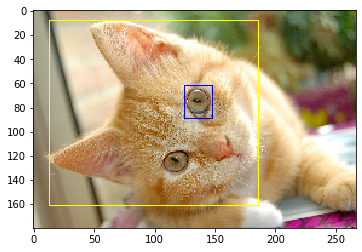

In [57]:
def image_decode_and_encode():
    #读取图像的原始数据
    #(1)path：图片所在路径 (2)decodestyle:图片的解码方式 ('r':UTF-8编码 'rb':非UTF-8编码)
    image_raw_data = tf.gfile.FastGFile("./datasets/cat.jpg",'rb').read()
    with tf.Session() as sess:
        img_data = tf.image.decode_jpeg(image_raw_data)
        print(img_data.eval())
        
        #使用pyplot工具可视化图像
        plt.imshow(img_data.eval())
        plt.show()
        
        #将表示一张图像的三维矩阵重新按照jpeg格式编码并存入文件中
        encoded_image = tf.image.encode_jpeg(img_data)
        with tf.gfile.GFile('./datasets/output/cat_encoded.jpg', 'wb') as f:
            f.write(encoded_image.eval())
            
def change_image_size():
    #加载原始图像
    image_raw_data = tf.gfile.FastGFile('./datasets/cat.jpg', 'rb').read();
    with tf.Session() as sess:
        #解码图像
        img_data = tf.image.decode_jpeg(image_raw_data);
        
        #可视化图像
        plt.imshow(img_data.eval())
        plt.show()
        
        #将图片数据转化为float类型
        img_data = tf.image.convert_image_dtype(img_data, dtype=tf.float32);
        #调整图片大小
        resized_image = tf.image.resize_images(img_data, [300, 300], method=0)
        
        #使用pyplot工具可视化图像
        plt.imshow(resized_image.eval())
        plt.show()
        
        #将图像存入文件中
        resized_image = tf.image.convert_image_dtype(resized_image, dtype=tf.uint8);
        encoded_image = tf.image.encode_jpeg(resized_image);
        with tf.gfile.GFile('./datasets/output/cat_resized.jpg', 'wb') as f:
            f.write(encoded_image.eval())
        
        #裁剪或者填充图像
        croped_image = tf.image.resize_image_with_crop_or_pad(img_data, 1000, 1000)
        padded_image = tf.image.resize_image_with_crop_or_pad(img_data, 3000, 3000)
        
        #可视化图像
        plt.imshow(croped_image.eval())
        plt.show()
        plt.imshow(padded_image.eval())
        plt.show()
        
        #等比例裁剪图像
        central_cropped_image = tf.image.central_crop(img_data, 0.5)
        
        #可视化图像
        plt.imshow(central_cropped_image.eval())
        plt.show()
        
def flip_and_transpose_image():
    #读取图像文件
    image_raw_data = tf.gfile.FastGFile('./datasets/cat.jpg', 'rb').read()
    with tf.Session() as sess:
        #解码图像
        image_data = tf.image.decode_jpeg(image_raw_data);
        
        #上下翻转图像
        flipped_image_up_down = tf.image.flip_up_down(image_data);
        #左右翻转图像
        flipped_image_left_right = tf.image.flip_left_right(image_data);
        #按对角线翻转图像
        
        transpoesd_image = tf.image.transpose_image(image_data)
        
        #可视化图像
        plt.imshow(image_data.eval())
        plt.show()
        plt.imshow(flipped_image_up_down.eval())
        plt.show()
        plt.imshow(flipped_image_left_right.eval())
        plt.show()
        plt.imshow(transpoesd_image.eval())
        plt.show()
        
def adjust_image_value():
    #读取图像文件
    image_raw_data = tf.gfile.FastGFile('./datasets/cat.jpg', 'rb').read()
    with tf.Session() as sess:
        #解码图像
        image_data = tf.image.decode_jpeg(image_raw_data)
        
        #调整图像亮度
        adjusted_image1 = tf.image.adjust_brightness(image_data, -0.5)
        #adjusted_image2 = tf.clip_by_value(adjusted_image1, 0.0, 1.0)
        adjusted_image3 = tf.image.adjust_brightness(image_data, 0.5)
        
        #调整图像的对比度
        adjusted_image4 = tf.image.adjust_contrast(image_data, 0.5)
        adjusted_image5 = tf.image.adjust_contrast(image_data, 5)
        adjusted_image6 = tf.image.random_contrast(image_data, 50, 100)
        
        #调整图像的色相
        adjusted_image7 = tf.image.adjust_hue(image_data, 0.1)
        adjusted_image8 = tf.image.adjust_hue(image_data, 0.3)
        adjusted_image9 = tf.image.adjust_hue(image_data, 0.6)
        adjusted_image10 = tf.image.adjust_hue(image_data, 0.9)
        
        #调整图像的饱和度
        #调整图像的亮度均值和方差
        
        #可视化图像
        plt.imshow(adjusted_image1.eval())
        plt.show()
        plt.imshow(adjusted_image3.eval())
        plt.show()
        plt.imshow(adjusted_image4.eval())
        plt.show()
        plt.imshow(adjusted_image5.eval())
        plt.show()
        plt.imshow(adjusted_image6.eval())
        plt.show()
        plt.imshow(adjusted_image7.eval())
        plt.show()
        plt.imshow(adjusted_image8.eval())
        plt.show()
        plt.imshow(adjusted_image9.eval())
        plt.show()
        plt.imshow(adjusted_image10.eval())
        plt.show()

def draw_bounding_box():
    #读取图像文件
    image_raw_data = tf.gfile.FastGFile('./datasets/cat.jpg', 'rb').read()
    with tf.Session() as sess:
        #解码图像
        image_data = tf.image.decode_jpeg(image_raw_data)
        #缩小图像，使标注框更加清楚
        image_data = tf.image.resize_images(image_data, [180, 267], method=1)
        batched_image = tf.expand_dims(tf.image.convert_image_dtype(image_data, dtype=tf.float32), 0)
        boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7],
                              [0.35, 0.47, 0.5, 0.56]]])
        result_image = tf.image.draw_bounding_boxes(batched_image, boxes)
        
        #可视化图像
        plt.imshow(result_image[0].eval())
        plt.show()
        
def main():
    #image_decode_and_encode()
    #change_image_size()
    #lip_and_transpose_image()
    #adjust_image_value()
    draw_bounding_box()
    
if __name__ == '__main__':
    main()
